# Likelihood functions: Workshop (part 1)

## Previous week's key points

* In order to derive a model $M$ _given_ a set of observations $D$ (data), we need to calculate $P(M|D)$ using the __Bayes' Theorem__:

$$ P(M|D) = \frac{P(D|M) P(M)}{P(D)} $$

* For now, we simplify the approach by noting that it scales with the _likelihood_:

$$ P(M|D) \sim P(D|M) $$

* As the data is a set of observations, $D = \left\{x_i\right\}$ and the model is described by the parameters $\left\{a_i\right\}$,

$$P(D|M) = P\left(\left\{x_i\right\} | \left\{a_i\right\}\right)$$

* Usually, the observations are independent to each other, so the joint probability is equal to the the product of all probabilities:

$$ P(D|M) = P\left(\left\{ x_i \right\} | \left\{a_i\right\}\right) = \prod_i P\left( x_i\ | \left\{a_i\right\}\right) $$

* The parameter estimates ___given___ this specific data set, are the ones for which the likelihood is maximized. In practice, what it is easier to __minimize the negated logarithm of the likelihood__ as (i) it produces smaller numbers (avoiding numerical overflows), (ii) allows using sums instead of products and (iii) most of the optimization algorithms are designed to minimize. The problem becomes:

$$ \underset{a_i}{\arg \min} \left(-\ln{P(D|M)}\right) \qquad \text{or} \qquad \underset{a_i}{\arg \min} \left(-\sum_i\log{P\left( x_i\ | \left\{a_i\right\}\right)}\right)$$

## Example A: exponential decay

Based on Example 10.1a from __Philip R. Bevington and D. Keith Robinson__ (1992). _Data reduction and error analysis for the physical sciences_. 2nd edition, WCB/McGraw Hill:

> Suppose we have a particle detector in our lab, that can trace the trajectories of particles or, equivalently, their lifetime. After an experiment, part of the data is a list of $N$ decay times $t_i$ of $K_s^0$ mesons. __Can we estimate the mean lifetime of the meson?__

### Model selection

First of all, we should decide which model to use. Namely, __what is the distribution we expect for the data?__. The probability of detecting a particle is

$$P_i = A_i \; p(t_i\ |\ \tau)$$

where
* $A_i$ is the detection efficiency (e.g. will the particle decay in the volume of our detector?) and
* $p(t_i | \tau)$ is the probability of a particle of mean lifetime $\tau$ to decay between time $t_i$ and $t_i + \mathrm{d}t$, so:

$$p(t_i\ |\ \tau) \propto e^{-t_i/\tau}$$

Let's assume that our experimental device can detect all particles (e.g. the travel distance of our particles is small compared to its volume.) Then $A_i = 1$, and we can easily normalize the probability:

$$\int\limits_{0}^{\infty} \ell e^{-t_i/\tau} \mathrm{d}t_i = 1 \Rightarrow \cdots \Rightarrow \ell = \frac{1}{\tau}
\Rightarrow P_i = \frac{1}{\tau} e^{-t_i / \tau}
$$

### Deriving the likelihood function

As a shortcut we will use $\mathcal{L}$ symbol to refer to the likelihood $P(D|M)$. Then,

$$
\begin{align}
\mathcal{L} &= \prod_{i} P_i \\
-\ln{\mathcal{L}} &= -\sum_{i} \ln{P_i} \\
\end{align}
$$

Note that the likelihood depends on the data and $\tau$ as $P_i = P_i(t_i, \tau)$.

### Maximum likelihood estimation

Now, having formulated the likelihood function, we can find the value of $\tau$ for which $\mathcal{L}$ is maximized, or equivalently, $-\ln{\mathcal{L}}$ is minimized.

## Code example

In the following script cells we will allow the user to create random samples, write a likelihood function, plot it and maximize it.

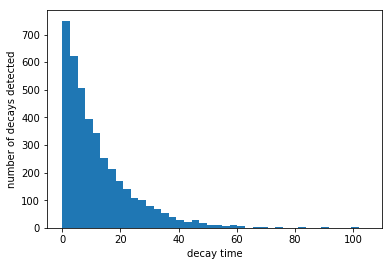

In [7]:
import scipy.stats as st
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

## Simulating the nature
real_tau = 12.5
real_distribution = st.expon(scale = real_tau)

## Simulating the experiment
N = 4000
our_sample = real_distribution.rvs(size = N)

## Plotting histogram of decay times
plt.hist(our_sample, 40)
plt.xlabel("decay time")
plt.ylabel("number of decays detected")
plt.show()

Real tau = 12.5
Opt. tau = 12.4568091082


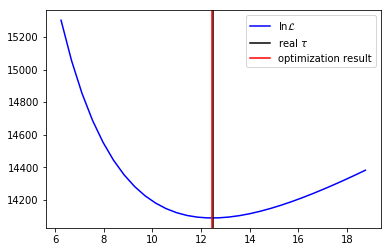

In [25]:
## Maximum Likelihood Estimation

def probability(x, tau):
    # returns the probability (or probabilities) of getting 'x'
    return np.exp(-x / tau) / tau

def neg_log_likelihood(tau, data):
    # returns the negated natural logarithm of the likelihood of 'data' given the model parameter 'tau'
    return -np.sum(np.log(probability(data, tau)))

# do various evalutations of -logL to plot later
taus = np.linspace(real_tau * 0.5, real_tau * 1.5, 30)
logLs = [neg_log_likelihood(tau, our_sample) for tau in taus]

# use scipy.optimize.minimize to find the minimum
opt_tau = opt.minimize_scalar(neg_log_likelihood, args = (our_sample), \
                              method = "bounded", bounds = (0, max(our_sample))).x

## Output
print("Real tau =", real_tau)
print("Opt. tau =", opt_tau)
plt.plot(taus, logLs, "b-", label = r"$\ln{\mathcal{L}}$")
plt.axvline(real_tau, color = "k", label = r"real $\tau$")
plt.axvline(opt_tau, color = "r", label = "optimization result")
plt.legend()
plt.show()

### Analytical derivation of $\tau$

In the previous example it is actually possible to derive the $\tau$ that maximizes $L$ analytically:

$$\begin{align}
& \frac{\mathrm{d}\mathcal{L}}{\mathrm{d}{\tau}} = 0
\Rightarrow \frac{\mathrm{d} \ln\mathcal{L}}{\mathrm{d} \tau} = 0
\Rightarrow \frac{\mathrm{d}}{\mathrm{d} \tau} \sum\limits_{i=1}^{N} \ln P_i = 0 \Rightarrow
\frac{\mathrm{d}}{\mathrm{d} \tau} \sum\limits_{i=1}^{N} \ln \left(\frac{1}{\tau} e^{-t_i / \tau} \right) = 0 \Rightarrow \\
\Rightarrow & \frac{\mathrm{d}}{\mathrm{d} \tau} \sum\limits_{i=1}^{N} \left(-\frac{t_i}{\tau} - \ln \tau\right) = 0
\Rightarrow \frac{\mathrm{d}}{\mathrm{d} \tau} \left( -\frac{\sum\limits_{i=1}^N {t_i}}{\tau} - N \ln \tau\right) = 0
\Rightarrow \frac{\sum\limits_{i=1}^N {t_i}}{\tau^2} - \frac{N}{\tau} = 0 \Rightarrow
\\
\overset{\tau, N \neq 0}{\Rightarrow} & \tau = \frac{1}{N}\sum\limits_{i=1}^{N} t_i
\end{align}$$

> The optimal $\tau$ is the sample mean of the observations $t_i$ - a great example that the intuitive answer can be justified using probability calculus!

In [17]:
print("The mean decay time in our sample is", np.mean(our_sample))

The mean decay time in our sample is 12.4568098782


## Example B: system failure...

> Note: in Bevington's book there are many variations of Example A, illustrating many aspects of the MLE procedure. The following example cannot be found there, as it was created for the SMAC session.

Now imagine the following scenario: at the beginning of the experiment, one of the two chips responsible for recording the data, could not register any information in the storage device. After $\tau_R$ time, the device was repaired and all data could be saved. Because of the time and money required for a rerun of the experiment, it was decided that the best solution is for the incident to be accounted for in the data reduction phase.

#### The following code simulates a problematic sample

Lost 1159 particles out of 4000


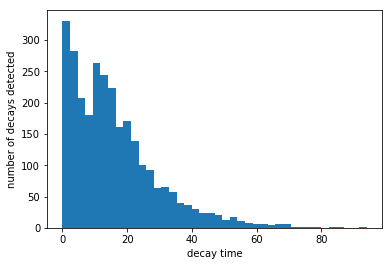

In [23]:
## Simulate the malfunction
repair_time = 10.3 # time at which the malfunction was remedied
coinflip = st.bernoulli(0.5) # giving 0 or 1 with probability 0.5 each (coin flip)

## Draw a new sample
new_sample = []
for i in range(N):
    t = real_distribution.rvs()
    if t < repair_time and coinflip.rvs() == 0: continue
    new_sample.append(t)
new_sample = np.array(new_sample)
print("Lost", N - len(new_sample), "particles out of", N)

## Histogram
plt.hist(new_sample, 40)
plt.xlabel("decay time")
plt.ylabel("number of decays detected")
plt.show()

#### We will now use the likelihood function we used before...

Opt. tau using old likelihood function: 16.1540369102


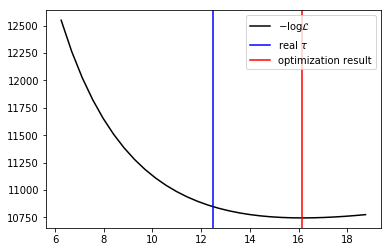

In [24]:
## Maximum Likelihood Estimation
taus = np.linspace(real_tau * 0.5, real_tau * 1.5, 30)
logLs = [neg_log_likelihood(tau, new_sample) for tau in taus]
opt_tau = opt.minimize_scalar(neg_log_likelihood, args = (new_sample), \
                              method = "bounded", bounds = (0, max(new_sample))).x

## Output
plt.plot(taus, logLs, "k-", label = r"$-\log{\mathcal{L}}$")
print("Opt. tau using old likelihood function:", opt_tau)
plt.axvline(real_tau, color = "b", label = r"real $\tau$")
plt.axvline(opt_tau, color = "r", label = "optimization result")
plt.legend()
plt.show()

While the optimization algorithm agrees with the plot of $-\ln{\mathcal{L}}$, the result apparently is higher than the _real_ one... Why?

### Explanation

As we proved analytically, the previous likelihood function is minimized by the sample mean of the observations. Due to the malfunction we lost a siginificant number of decays with small values. Consequently, the sample mean __overestimates__ the mean lifetime.

## Accounting for the malfunction in the likelihood function

#### What changes in the model?

Before the repair, we lost half of our data. This means that the detection efficiency is no longer $1$ but depends on time:

$$ A(t) = \begin{cases} 0.5 \quad &\text{ for } t < t_R \\ 1 \quad &\text{ for } t \geq t_R \end{cases} $$

#### A new probability for each event

Now having in mind that the exponential decay law is unaffected by the malfucntion, the _updated_ probability of getting an event with decay time $t$ is:

$$ P_\text{new}(t) = \ell A(t) e^{-t/\tau} $$

We normalize,
$$
\begin{align}
&\int\limits_{0}^{\infty} {\ell A(t) e^{-t/\tau} \ \mathrm{d}t} = 1 \Rightarrow
\int\limits_0^{\tau_R} \frac{1}{2} e^{-t/\tau} \ \mathrm{d}t + \int\limits_{\tau_R}^\infty e^{-t/\tau} \ \mathrm{d}t = \frac{1}{\ell}
\Rightarrow \cdots \Rightarrow \\ \Rightarrow &\ell = \frac{2}{\tau\left(1 + e^{-\tau_R/\tau}\right)}
\Rightarrow P_\text{new}(t) = \frac{2 A(t) e^{-t/\tau}}{\tau\left(1 + e^{\tau_R/\tau}\right)}
\end{align}
$$

#### New likelihood function

We simply use the new event probability:
$$ -\ln{\mathcal{L}} = -\sum\limits_{i=1}^N \ln{P_\text{new}(t_i)} $$

#### Now, let's try to find the mean lifetime, assuming we know the real repair time...

Real tau = 12.5
Opt. tau = 12.5302239949


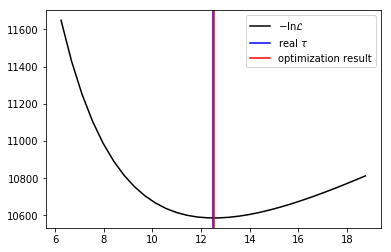

In [13]:
## Maximum Likelihood Estimation

def new_probability(x, tau):
    # returns the probability (or probabilities) of getting 'x'
    prob = 2.0 * np.exp(-x / tau) / (tau * (1.0 + np.exp(-repair_time / tau)))
    for i in range(len(x)):
        if x[i] < repair_time: prob[i] /= 2.0
    return prob

def new_neg_log_likelihood(tau, data):
    # returns the negated natural logarithm of the likelihood of 'data' given the model parameter 'tau'
    return -np.sum(np.log(new_probability(data, tau)))

taus = np.linspace(real_tau * 0.5, real_tau * 1.5, 30)
logLs = [new_neg_log_likelihood(tau, new_sample) for tau in taus]
opt_tau = opt.minimize_scalar(new_neg_log_likelihood, args = (new_sample), \
                              method = "bounded", bounds = (0, max(new_sample))).x

# Output
print("Real tau =", real_tau)
print("Opt. tau =", opt_tau)
plt.plot(taus, logLs, "k-", label = r"$-\ln{\mathcal{L}}$")
plt.axvline(real_tau, color = "b", label = r"real $\tau$")
plt.axvline(opt_tau, color = "r", label = "optimization result")
plt.legend()
plt.show()

## A 2D likelihood function

Suppose that the exact time of the repair could not be recorded (e.g. complicated to analyse the response of the electronics). In the histogram of the sample we can distiguish the bump in the detections, but as that depends on the binning of the histogram we should use a more "robust" method: minimizing both $\tau$ and $\tau_R$!

#### Let's try again, but searching for the mean lifetime and the repair time simulteneously!...

Real parameters = [12.5, 10.3]
Opt. parameters = [ 12.96508114  10.18379079]


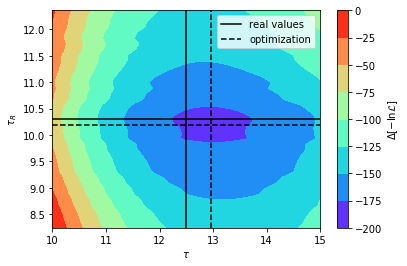

In [27]:
def new_probability(x, tau, repair_tau):
    # returns the probability (or probabilities) of getting 'x'
    prob = np.exp(-x / tau) / (tau * (1.0 + np.exp(-repair_tau / tau)))
    for i in range(len(x)):
        if x[i] < repair_tau: prob[i] /= 2.0
    return prob

def new_neg_log_likelihood(params, data):
    # returns the negated natural logarithm of the likelihood of 'data' given the model parameters [tau, repair_tau]
    return -np.sum(np.log(new_probability(data, params[0], params[1])))

taus = np.linspace(real_tau * 0.8, real_tau * 1.2, 40)
reps = np.linspace(repair_time * 0.8, repair_time * 1.2, 40)

Z = np.array([[new_neg_log_likelihood([x, y], new_sample) for x in taus] for y in reps])
Z = Z - np.max(Z)
opt_result = opt.minimize(new_neg_log_likelihood, [real_tau * 1.2, repair_time * 1.2], \
                          args = (new_sample), method = "Powell", tol=1e-8).x

print("Real parameters =", [real_tau, repair_time])
print("Opt. parameters =", opt_result)
plt.contourf(taus, reps, Z, cmap = "rainbow")
plt.axvline(real_tau, color = "k", linestyle = "-", label = "real values")
plt.axhline(repair_time, color = "k", linestyle = "-")
plt.axvline(opt_result[0], color = "k", linestyle = "--", label = "optimization")
plt.axhline(opt_result[1], color = "k", linestyle = "--")

plt.xlabel(r"$\tau$")
plt.ylabel(r"$\tau_R$")
cb = plt.colorbar()
cb.set_label(r"$\Delta\left[-\ln \mathcal{L}\right]$")
plt.legend()
plt.show()